In [1]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt

In [5]:
m = mp.Model()

A = m.add_var(name='Lote de Calças', var_type=mp.CONTINUOUS)
B = m.add_var(name='Lote de Camisas', var_type=mp.CONTINUOUS)

m.objective = mp.maximize(500 * A + 800 * B)

m += A * 10 + B * 20 <= 50
m += B * 10 <= 30
m += A * 20 + B * 10 <= 80
m += A * 30 + B * 35 <= 130
m += A * 12 + B * 8 <= 120
m += A * 10 + B * 15 <= 100

m.optimize()

Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 3 (-3) rows, 2 (0) columns and 6 (-5) elements
Clp1000I sum of infeasibilities 6.49942e-08 - average 2.16647e-08, 0 fixed columns
Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 2340 Dual inf 130000 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 2340
Clp0000I Optimal - objective value 2340
Clp0000I Optimal - objective value 2340
Coin0511I After Postsolve, objective 2340, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 2340 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00


<OptimizationStatus.OPTIMAL: 0>

In [8]:
print(f"Lote de Calças: {A.x:.0f}")
print(f"Lote de Camisas: {B.x:.0f}")
print(f"Max return: {m.objective_value:.0f}")

Lote de Calças: 3
Lote de Camisas: 1
Max return: 2340


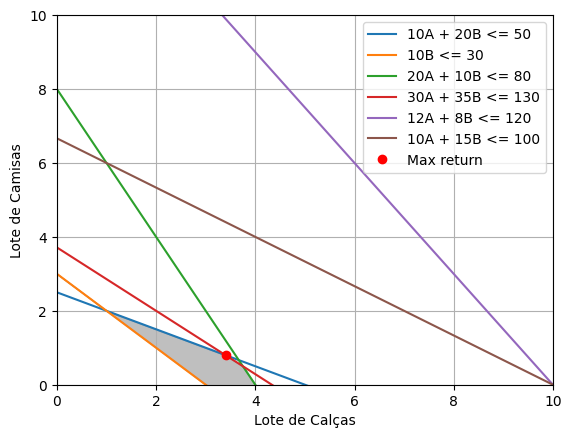

In [30]:
x = np.linspace(0, 10, 200)

r1 = (50 - 10 * x) / 20
plt.plot(x, r1, label="10A + 20B <= 50")

r2 = 3 - x
plt.plot(x, r2, label="10B <= 30")

r3 = (80 - 20 * x) / 10
plt.plot(x, r3, label="20A + 10B <= 80")

r4 = (130 - 30 * x) / 35
plt.plot(x, r4, label="30A + 35B <= 130")

r5 = (120 - 12 * x) / 8
plt.plot(x, r5, label="12A + 8B <= 120")

r6 = (100 - 10 * x) / 15
plt.plot(x, r6, label="10A + 15B <= 100")

plt.xlim(0, 10)
plt.ylim(0, 10)

plt.xlabel("Lote de Calças")
plt.ylabel("Lote de Camisas")
plt.plot(A.x, B.x, 'ro', label="Max return")
plt.fill_between(x, r2, np.maximum(np.minimum.reduce([r1, r3, r4, r5, r6]), r2), color='gray', alpha=0.5)

plt.grid()
plt.legend()
plt.show()